In [100]:
import pandas as pd
import logging
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

from sklearn.ensemble import RandomForestRegressor

from Modules.ML_pipelines import *

### Outcome Columns of Interest ###

* `TripStart`
* `TripEnd`
* `TripType`
* `NumTrips`
* `TripDisExSW`

In [2]:
distance_df = pd.read_pickle("/home/trapfishscott/Cambridge24.25/D200_ML_econ/ProblemSets/Project/data/merged_df_analysis.pkl")

### Gathering info on correlations and categorical columns

For `TripStart`

In [ ]:
rf_for_fi(df=distance_df, outcome="TripStart", corr_cut_off=0.25, max_categories=55, cols_to_exclude=["W5xHH", "W3", "W5", "W2", "TripEndMinutes", "TripStartMinutes"])

W5                        0.03
W2                        0.03
EngineCap                 0.02
TWEWeek                   0.02
TWSWeek                   0.02
TripEndMinutes            0.02
TripStartMinutes          0.02
VehAnMileage              0.02
TWSDay                    0.01
TWEDay                    0.01
VehTotMileage_B01ID       0.01
VehAge_B01ID              0.01
QuotaMonth_B01ID          0.01
TravelWeekDay_B01ID       0.01
TravDay_x                 0.01
TWSMonth                  0.01
DrivExp_B01ID             0.01
VehCO2Tax2008_B01ID       0.01



In [4]:
rf_for_fi(df=distance_df, outcome="TripEnd", corr_cut_off=0.25, max_categories=25)

W5xHH                     0.03
W3                        0.02
EngineCap                 0.02
W5                        0.02
W2                        0.02
TripEndMinutes            0.02
TripStartMinutes          0.02
TWSDay                    0.02
TWEDay                    0.02
VehAnMileage              0.01
VehTotMileage_B01ID       0.01
VehAge_B01ID              0.01
TWEWeek                   0.01
TWSWeek                   0.01
DrivExp_B01ID             0.01
VehCO2Tax2008_B01ID       0.01
TravDay_x                 0.01



In [5]:
rf_for_fi(df=distance_df, corr_cut_off=0.15, outcome="NumTrips", max_categories=55, cols_to_exclude=["JTTXSC", "JD", "JOTXSC", "TripTravTime", "TripTotalTime", "TripDisIncSW", "TripDisExSW", "IndividualID_x", "IndividualID_y", "VehicleID"])

HHoldNumChildren          0.02
EngineCap                 0.02
W5xHH                     0.02
W3                        0.02
TWSWeek                   0.02
TWEWeek                   0.02
TripStartMinutes          0.02
W2                        0.02
VehAnMileage              0.02
VehTotMileage_B01ID       0.01
VehEligMileage_B01ID      0.01
W5                        0.01
TripEndMinutes            0.01
TWSDay                    0.01
TWEDay                    0.01
VehAge_B01ID              0.01
VehWeekMileage_B01ID      0.01



In [6]:
rf_for_fi(df=distance_df, corr_cut_off=0.15, outcome="TripDisExSW", max_categories=55, cols_to_exclude=["NumTrips",
                                                                                                         "JourSeq",
                                                                                                         "TripStart_B02ID",
                                                                                                         "TripEnd",
                                                                                                         "TripStartMinutes",
                                                                                                         "TripStart",
                                                                                                         "W5xHH",
                                                                                                         "TripEndMinutes",
                                                                                                         "NumStages"])

TripEnd_B02ID             0.06
TripEnd_B01ID             0.04
TripEndHours              0.03
TripStartHours            0.03
TripStart_B01ID           0.03
IndIncome2002_B02ID       0.02
EngineCap                 0.02
TripOrigGOR_B02ID         0.01
TripDestGOR_B02ID         0.01
W5                        0.01



Lets look at some of the variables that help to explain our ootcomes of interest

<BarContainer object of 13 artists>

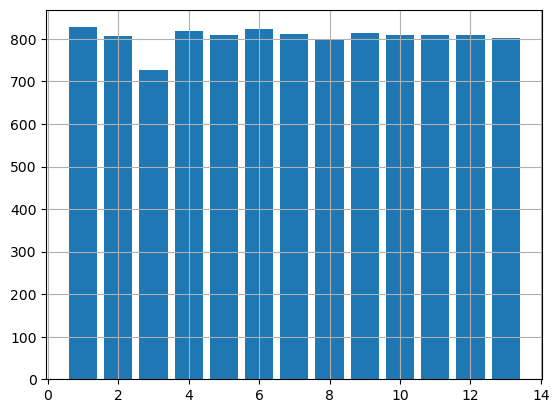

In [ ]:
x = distance_df.groupby("EngineCap_B01ID")["TripStart"].mean().index
y = distance_df.groupby("EngineCap_B01ID")["TripStart"].mean().values

plt.grid()

plt.bar(x, y)

plt.title("A barplot of mean start time by EngineCap (binned)")
plt.ylabel("Mean Start Time")

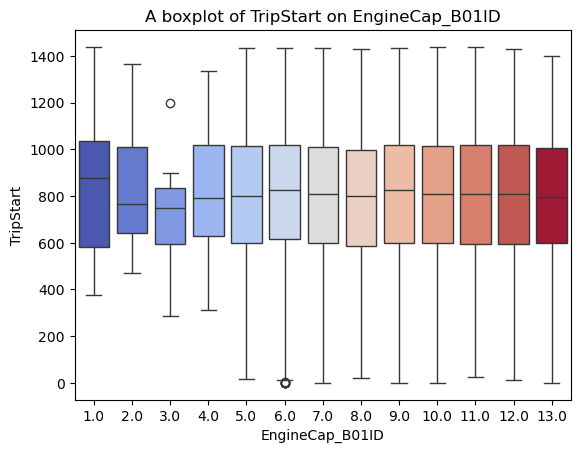

In [192]:
def make_box_plot(x, y, data=distance_df):

    plt.title(f"A boxplot of {y} on {x}")
    sns.boxplot(data=data, x=x, y=y, palette='coolwarm',  hue=x, legend=False)


make_box_plot(x='EngineCap_B01ID', y='TripStart')

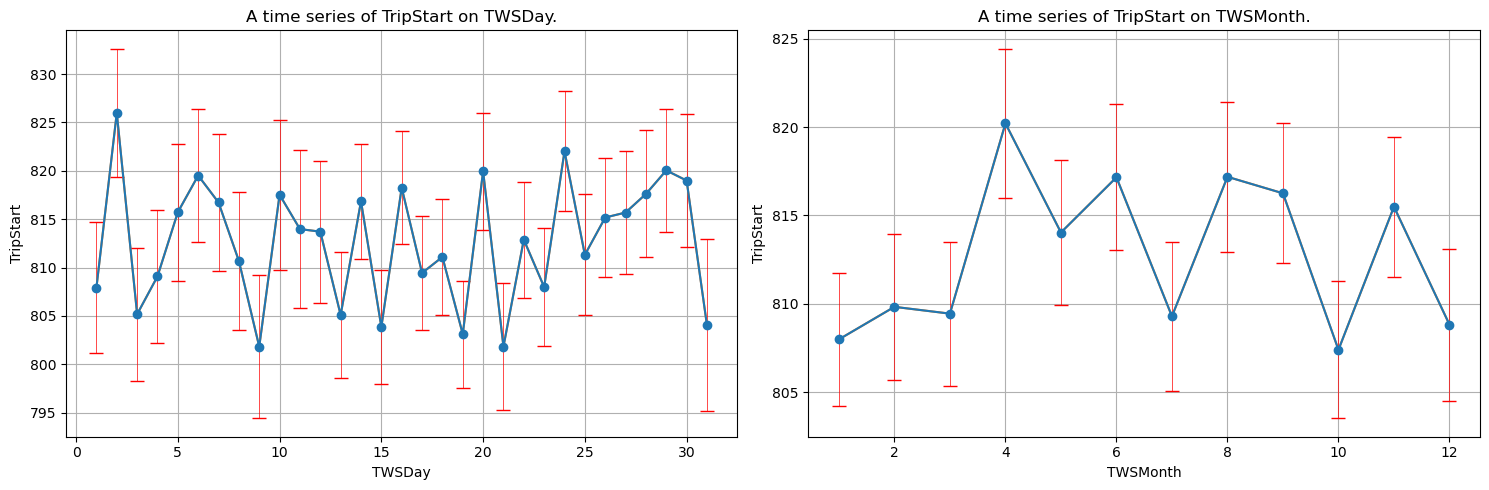

In [106]:




def make_time_plot(x, y):
    plt.title(f"A time series of {y} on {x}.")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")

    grouped_df = distance_df.groupby(x)[y].agg(["mean", "std", "count"])
    grouped_df["stderr"] = grouped_df["std"]/ grouped_df["count"]**0.5

    x_vals = grouped_df.index
    y_vals = grouped_df["mean"]
    y_err = grouped_df["stderr"]

    plt.grid()

    plt.errorbar(x_vals, y_vals,  yerr=y_err, fmt="o-", capsize=5, capthick=1, ecolor="red", elinewidth=0.5)
    plt.plot(x_vals,y_vals)



plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_time_plot(x="TWSDay", y="TripStart")

plt.subplot(1,2,2)
y = make_time_plot(x="TWSMonth", y="TripStart")

plt.tight_layout()

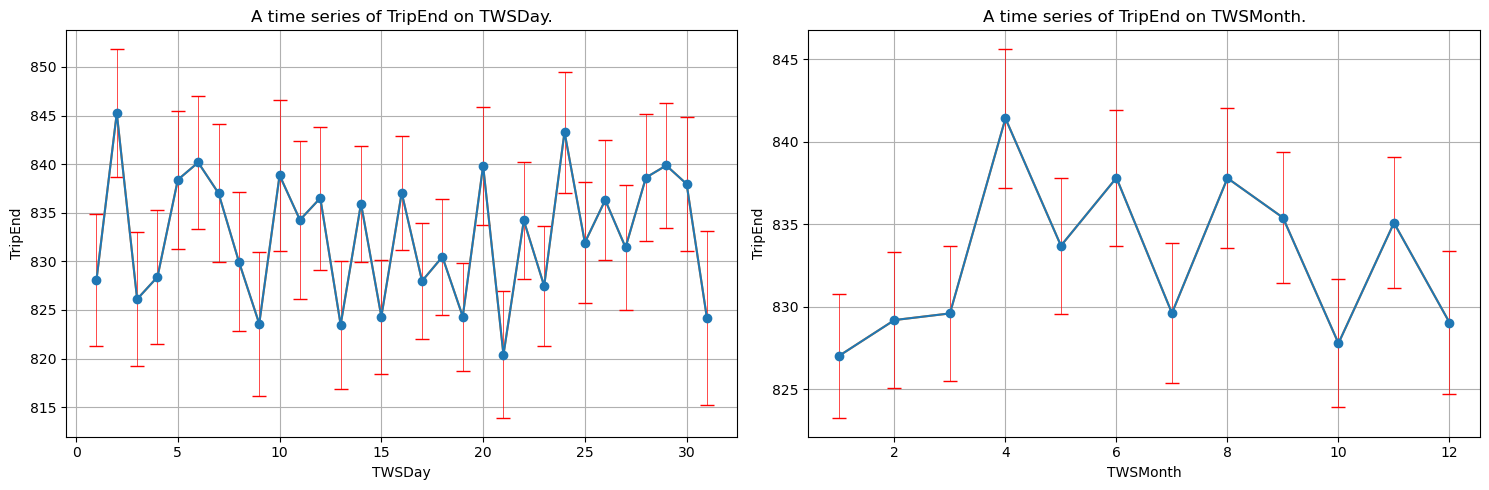

In [107]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_time_plot(x="TWSDay", y="TripEnd")

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="TripEnd")

plt.tight_layout()

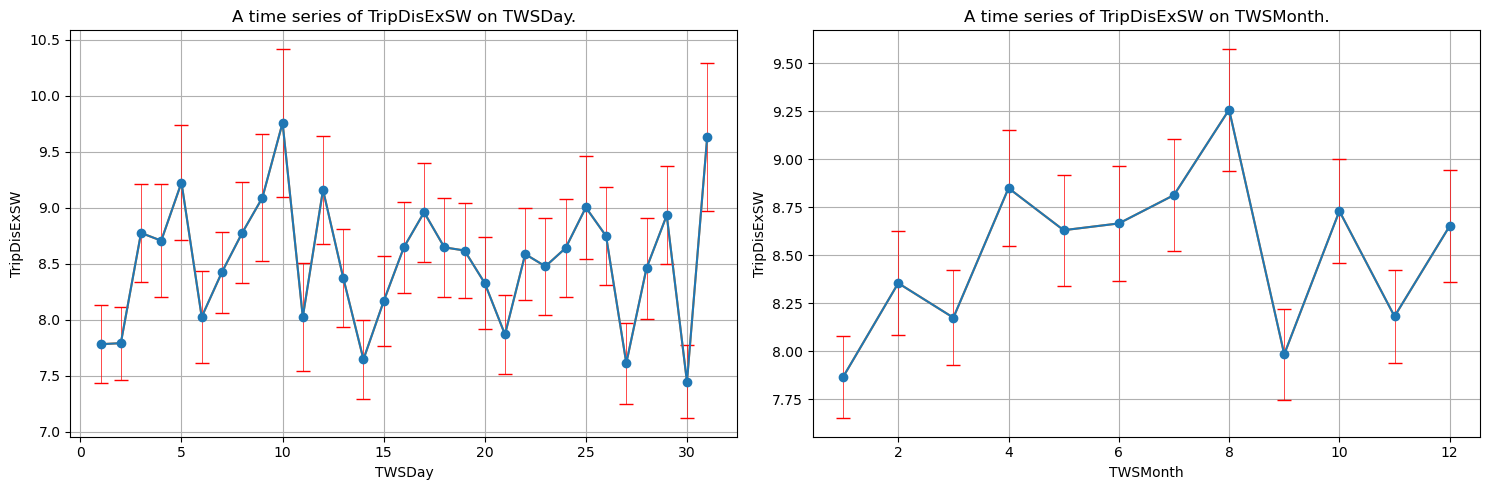

In [109]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_time_plot(x="TWSDay", y="TripDisExSW")

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="TripDisExSW")

plt.tight_layout()

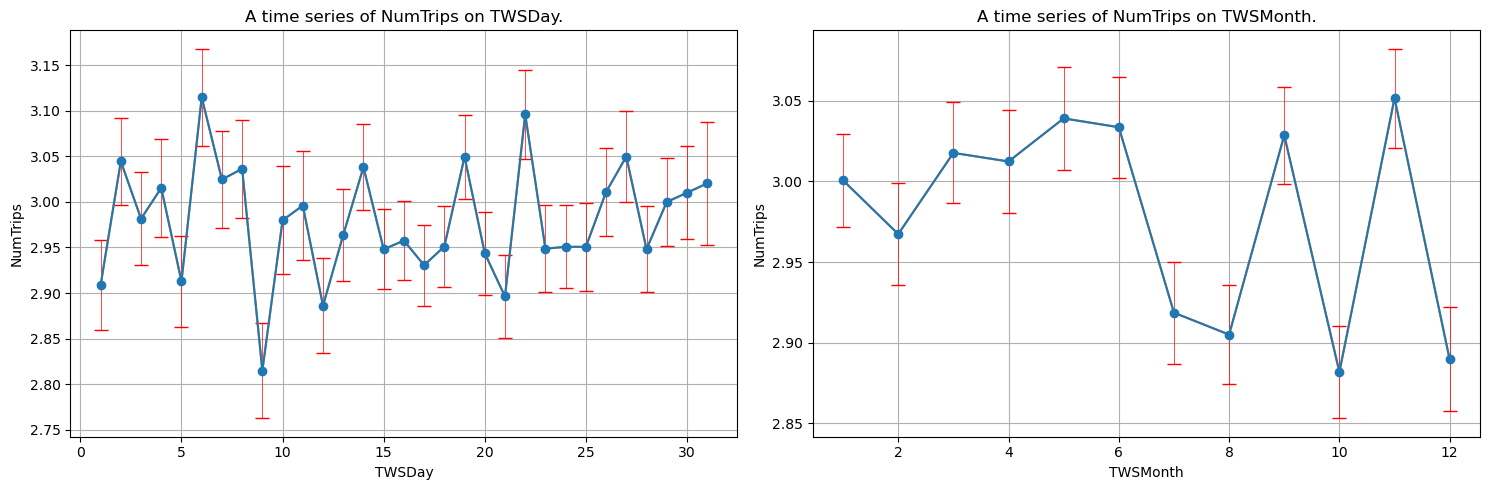

In [110]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_time_plot(x="TWSDay", y="NumTrips")

plt.subplot(1,2,2)
make_time_plot(x="TWSMonth", y="NumTrips")

plt.tight_layout()

In [158]:
def plot_TripType_ts(time_var):

    trip_type_mapping = {0: ('Home', 'Work'),
                        1: ('Home', 'Other'),
                        2: ('Other', 'Home'),
                        3: ('Work', 'Home'),
                        4: ('Other', 'Other'),
                        5: ('Work', 'Other'),
                        6: ('Other', 'Work'),
    }

    TripType_ts_data = distance_df.groupby(time_var)["TripType"].value_counts()

    TripType_ts_data = TripType_ts_data.to_frame().reset_index()

    for i in TripType_ts_data["TripType"].unique():
        #print(i)
        dta = TripType_ts_data[TripType_ts_data["TripType"] == i]
        x = dta["count"]
        y = dta[time_var]

        plt.plot(y, x, label=str(trip_type_mapping[i]))

    plt.title(f"TripType on {time_var}")
    plt.grid()
    plt.legend()


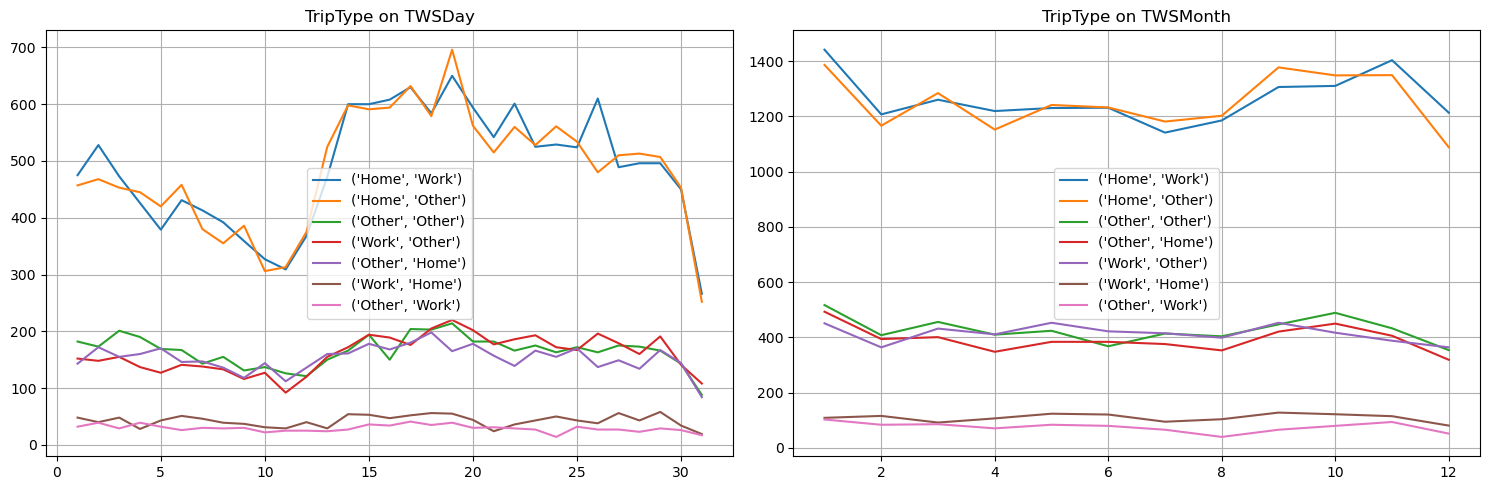

In [159]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plot_TripType_ts("TWSDay")

plt.subplot(1,2,2)
plot_TripType_ts("TWSMonth")

plt.tight_layout()

Exploring Variables relating to vehicle

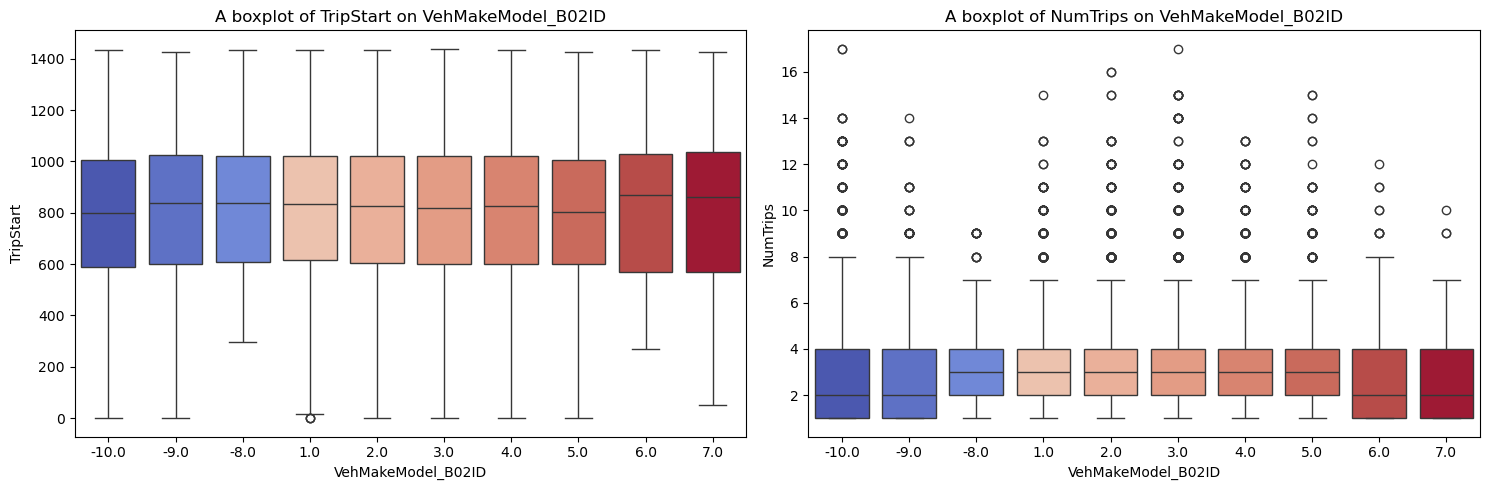

In [167]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
make_box_plot(x="VehMakeModel_B02ID", y="TripStart")

plt.subplot(1,2,2)
make_box_plot(x="VehMakeModel_B02ID", y="NumTrips")



plt.tight_layout()

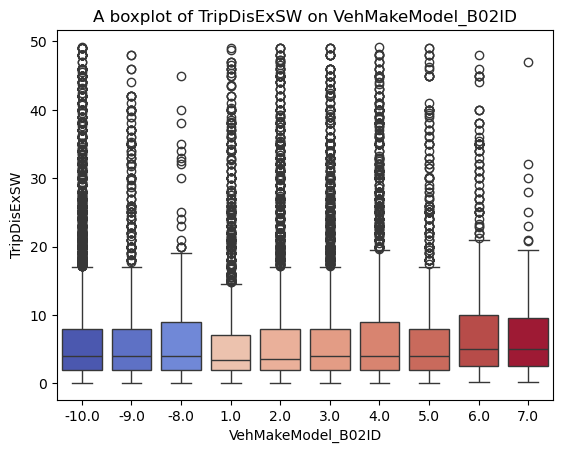

In [195]:


data_no_outlier = distance_df[distance_df["TripDisExSW"] < 50]


make_box_plot(data=data_no_outlier, x="VehMakeModel_B02ID", y="TripDisExSW")

Now Looking at individual Income

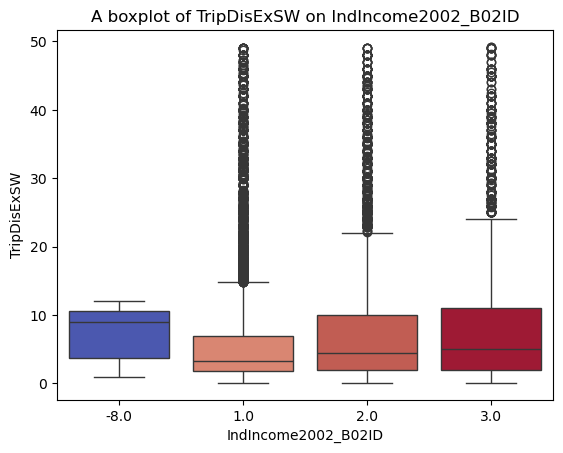

In [201]:
make_box_plot(data=data_no_outlier, x="IndIncome2002_B02ID", y="TripDisExSW")

Effect of Household num children on num trips

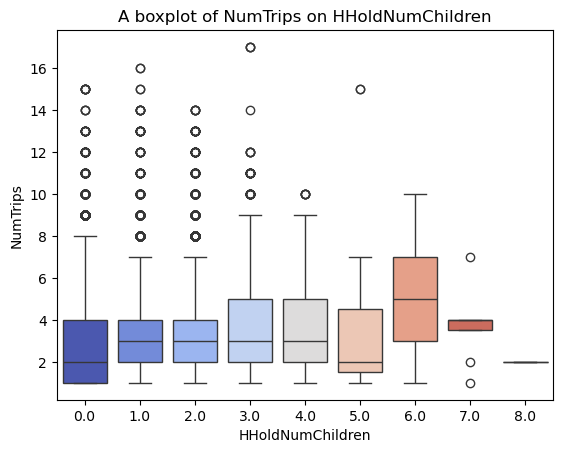

In [202]:
make_box_plot(x="HHoldNumChildren", y="NumTrips")

In addition to our outcome variables of interest, we will include in our GAN dataframe:

* `PSUGOR_B02ID` --> PSU Region
* `TWSMonth_B01ID` --> Travel Week Start - Month - coded month
* `IndIncome2002_B02ID` --> Individual Income - 2002 bandings - 3 categories
* `HHoldNumChildren` --> Number of children in household - actual number                                      
* `TravelYear` --> Year of trip
* `VehMakeModel_B02ID` --> Vehicle length - 7 summary categories
* `TravelWeekDay_B03ID` --> Day of week trip took place - weekday and weekend split

In [208]:
outcome_vars = ["TripStart", "TripEnd", "NumTrips", "TripDisExSW", "TripType"]
extra_vars = ["IndividualID_x", "PSUGOR_B02ID", "TWSMonth", "IndIncome2002_B02ID", "HHoldNumChildren", "TravelYear", "VehMakeModel_B02ID", "TravelWeekDay_B03ID"]

In [211]:
gan_df = distance_df[extra_vars + outcome_vars]

In [215]:
for i in gan_df["IndividualID_x"].unique()[:5]:
    display(gan_df[gan_df["IndividualID_x"]==i])
    print("")


,IndividualID_x,PSUGOR_B02ID,TWSMonth,IndIncome2002_B02ID,HHoldNumChildren,TravelYear,VehMakeModel_B02ID,TravelWeekDay_B03ID,TripStart,TripEnd,NumTrips,TripDisExSW,TripType
0,2.021004e+09,-10.0,4.0,2.0,2.0,2021.0,-10.0,2.0,925.0,935.0,6.0,2.5,0
45617,2.021004e+09,-10.0,4.0,2.0,2.0,2021.0,-10.0,1.0,525.0,530.0,6.0,0.4,0


,IndividualID_x,PSUGOR_B02ID,TWSMonth,IndIncome2002_B02ID,HHoldNumChildren,TravelYear,VehMakeModel_B02ID,TravelWeekDay_B03ID,TripStart,TripEnd,NumTrips,TripDisExSW,TripType
1,2.014006e+09,3.0,5.0,3.0,2.0,2014.0,-10.0,2.0,870.0,905.0,6.0,14.0,1
6084,2.014006e+09,3.0,5.0,3.0,2.0,2014.0,-10.0,1.0,1185.0,1200.0,6.0,5.0,0


,IndividualID_x,PSUGOR_B02ID,TWSMonth,IndIncome2002_B02ID,HHoldNumChildren,TravelYear,VehMakeModel_B02ID,TravelWeekDay_B03ID,TripStart,TripEnd,NumTrips,TripDisExSW,TripType
2,2.016012e+09,8.0,9.0,2.0,0.0,2016.0,-10.0,1.0,651.0,655.0,1.0,1.0,1


,IndividualID_x,PSUGOR_B02ID,TWSMonth,IndIncome2002_B02ID,HHoldNumChildren,TravelYear,VehMakeModel_B02ID,TravelWeekDay_B03ID,TripStart,TripEnd,NumTrips,TripDisExSW,TripType
3,2.009014e+09,10.0,8.0,1.0,0.0,2009.0,3.0,2.0,860.0,870.0,4.0,2.0,0
36990,2.009014e+09,10.0,8.0,1.0,0.0,2009.0,3.0,2.0,720.0,765.0,4.0,25.0,5


,IndividualID_x,PSUGOR_B02ID,TWSMonth,IndIncome2002_B02ID,HHoldNumChildren,TravelYear,VehMakeModel_B02ID,TravelWeekDay_B03ID,TripStart,TripEnd,NumTrips,TripDisExSW,TripType
4,2.004011e+09,3.0,7.0,2.0,2.0,2004.0,4.0,1.0,990.0,1020.0,2.0,10.0,2
